### Packages and Data

In [2]:
!pip3 install pandas
!pip3 install tqdm
!pip3 install seaborn
!pip install researchpy
!pip install --pre -i https://pypi.anaconda.org/scipy-wheels-nightly/simple scipy
!pip install datatable

Looking in indexes: https://pypi.anaconda.org/scipy-wheels-nightly/simple


In [4]:
pip install --pre -i https://pypi.anaconda.org/scipy-wheels-nightly/simple scipy

Looking in indexes: https://pypi.anaconda.org/scipy-wheels-nightly/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
import random
from datatable import dt, f, by

In [2]:
!pip install datatable
from datatable import dt, f, by

In [46]:
# POSTS
posts = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv')
columns = ['profile_id', 'numbr_likes', 'location_id', 'number_comments', 'post_type']
posts = posts[:, columns]

posts = posts.to_pandas()
posts = posts.dropna()

In [19]:
# PROFILES
profiles = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_profiles.csv')
columns2 = ['profile_id', 'followers', 'following', 'n_posts', 'is_business_account']
profiles = profiles[:, columns2]

profiles = profiles.to_pandas()
profiles.dropna()

,profile_id,followers,following,n_posts,is_business_account
0,4.721050e+09,146.0,250.0,170.0,False
1,5.905830e+08,1145.0,534.0,2878.0,False
2,1.074147e+09,324.0,469.0,431.0,False
5,1.450642e+08,192.0,266.0,590.0,False
6,2.061868e+09,4137.0,157.0,753.0,True
...,...,...,...,...,...
4509578,4.038738e+09,809.0,3217.0,576.0,False
4509579,1.840612e+08,599.0,651.0,193.0,False
4509580,4.070370e+09,261.0,386.0,30.0,False
4509581,1.418322e+09,481.0,468.0,497.0,False


In [142]:
locations = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_locations.csv')
locations = locations.to_pandas()

In [47]:
posts.head(3)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03,1,#meraviglia #incensi #the #candele #profumo #a...,9,0


In [49]:
profiles.head(3)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False


In [50]:
locations.head(3)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",,,,,,,False,...,,,,,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,,,Nová Vieska,,SK,,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,,nova-vieska,,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",,NP,,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,,2019-05-29 01:21:46.295


### RQ1

In [130]:
from matplotlib.pyplot import xlim

posts[['numbr_likes', 'number_comments']].describe()

# Looking at the table below, it is clear that we are in the presence of outliers. In fact, the 75th percentile and the maximum value for likes and comments are strongly different.

,numbr_likes,number_comments
count,2.862506e+07,2.862506e+07
mean,2.880860e+02,7.327707e+00
std,5.166535e+03,1.763913e+02
min,0.000000e+00,0.000000e+00
25%,2.100000e+01,0.000000e+00
50%,5.000000e+01,2.000000e+00
75%,1.240000e+02,5.000000e+00
max,4.264745e+06,4.889530e+05


Text(0, 0.5, 'Frequencies')

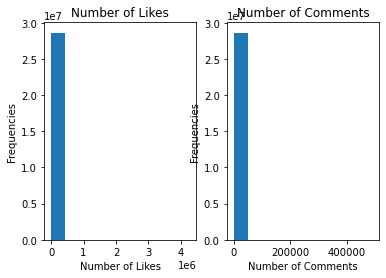

In [131]:
# For example,
#  doing an histograms produces this output for numbr_likes...
from matplotlib.pyplot import xlabel


plt.subplot(1, 2, 1)
plt.hist(posts['numbr_likes'])
plt.title('Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequencies')

plt.subplot(1, 2, 2)
plt.hist(posts['number_comments'])
plt.title('Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequencies')

# Clearly not useful! The distribution is too skewed.

Text(0, 0.5, 'Frequencies')

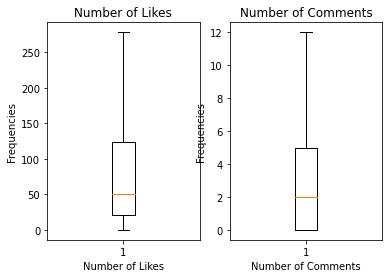

In [132]:
# A valid alternative is to provide a representation by removing the outliers. For example, we can use a box plot, which gives us information about the quartiles of the distribution. 
# How to remove outliers? We have to compute the InterQuantile Range (IQR), that is Quartile3 - Quartile1 (Q3 - Q1). The observations that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers. We can easily do this opration with the option showfliers = False:

plt.subplot(1, 2, 1)
plt.boxplot(posts['numbr_likes'], showfliers= False)
plt.title('Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequencies')

plt.subplot(1, 2, 2)
plt.boxplot(posts['number_comments'], showfliers= False)
plt.title('Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequencies')

# Also in the boxplot, there is an evident positive skewness.

([<matplotlib.patches.Wedge at 0x7fc87b333400>,
 [Text(-1.0917523052900666, 0.13445037706836419, 'Photos'),
  Text(1.0917523257458024, -0.13445021096536722, 'Videos')],
 [Text(-0.5955012574309454, 0.07333656931001682, '96.1%'),
  Text(0.5955012685886194, -0.07333647870838211, '3.9%')])

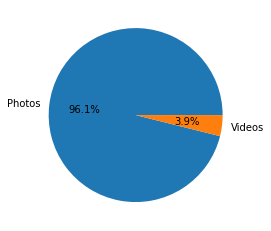

In [135]:
# Instagram gives you the possibility to post various kinds of content, such as photos and videos.
# In our dataset the trend is the following:

counts = np.array(posts['post_type'].value_counts())[:2]
labels = ['Photos', 'Videos', 'Multy']
plt.pie(counts, labels = labels[:2], autopct='%.1f%%')

# This means the majority of contents on Instagram are photos.
# The dataset id referred to 2019, however. In the last year, Instagram has made some big changes to the app as it moved to more videos on the feed, following the steps of Tik Tok.


In [138]:
# And what about the number of following and followers?
# For an in-depth analysis, please refer to RQ8.

profiles[['following', 'followers', 'n_posts']].describe()

,following,followers,n_posts
count,3.452771e+06,3.452771e+06,3.452771e+06
mean,1.405641e+03,4.739899e+03,4.095414e+02
std,8.113473e+03,1.939087e+05,1.041940e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,1.590000e+02,2.200000e+01
50%,7.540000e+02,4.060000e+02,1.200000e+02
75%,1.573000e+03,9.740000e+02,4.200000e+02
max,4.191080e+06,2.854576e+08,1.837300e+05


Pearson product-moment correlation coefficient for following vs followers: 0.008368111707669252


Text(0, 0.5, 'Number of followers')

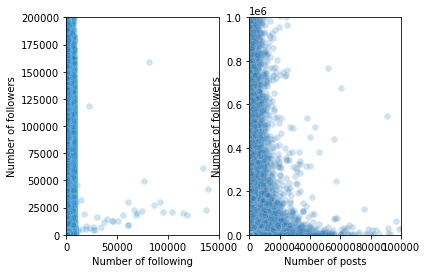

In [140]:
# UPDATE: I THINK THIS IS NOT USEFUL, MAYBE WE HAVE TO DELETE THIS CELL
# For now, I leave it here.

# But let's try to see if there is a relationship between the number of followers and the number of following, and if these values are influenced by the number of posts of the user.
# We use a scatter plot to look for some association:

filtered_followers = profiles['followers'].dropna()
filtered_following = profiles['following'].dropna()
filtered_npost = profiles['n_posts'].dropna()

# First plot (left):
plt.subplot(1, 2, 1)
plt.xlim(0, 150000)
plt.ylim(0, 200000)

plt.scatter(filtered_following, filtered_followers, alpha=0.2, edgecolors = 'lightskyblue')
plt.xlabel('Number of following')
plt.ylabel('Number of followers')

# It seems there is not a strong (linear) association between the number of people a user follows on Instagram and the number of followers he/she has. In fact:

print('Pearson product-moment correlation coefficient for following vs followers:', stats.pearsonr(filtered_following, filtered_followers)[0])

# Second plot (right):
plt.subplot(1, 2, 2)

plt.xlim(0, 100000)
plt.ylim(0, 1000000)

plt.scatter(filtered_npost, filtered_followers, alpha=0.2, edgecolors = 'lightsteelblue')
plt.xlabel('Number of posts')
plt.ylabel('Number of followers')
# Again, we cannot conclude that posting more photos brings a larger number of followers.


Text(0, 0.5, 'Number of followers')

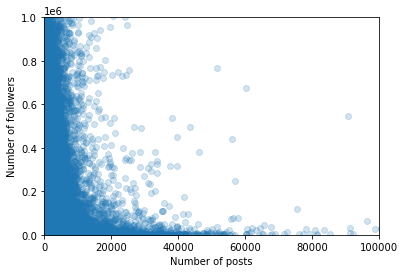

In [57]:
# UPDATE: I THINK THIS IS NOT USEFUL, MAYBE WE HAVE TO DELETE THIS CELL
# For now, I leave it here.

# And what about the number of posts and the number of followers? We can try to do another scatterplot:

filtered_npost = profiles['n_posts'].dropna()

plt.xlim(0, 100000)
plt.ylim(0, 1000000)

plt.scatter(filtered_npost, filtered_followers, alpha=0.2)
plt.xlabel('Number of posts')
plt.ylabel('Number of followers')

# Again, we cannot conclude that posting more photos brings a larger number of followers.

([<matplotlib.patches.Wedge at 0x7fc881e2c070>,
 [Text(-0.7821153977760188, 0.7734956396526487, 'Business account'),
  Text(0.7821153977760186, -0.7734956396526489, 'Non-business account')],
 [Text(-0.4266083987869193, 0.42190671253780837, '75.2%'),
  Text(0.4266083987869192, -0.4219067125378084, '24.8%')])

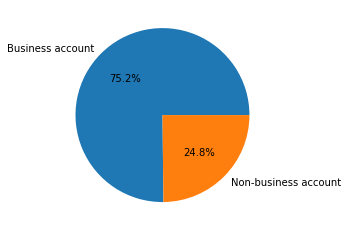

In [140]:
# Another consideration. In the last years social networks have also become an important commercial tool, also thanks to the possibility of using business accounts.
# In our dataset, almost the 25% of the accounts were business accounts!
counts_business = profiles['is_business_account'].value_counts()
labels_business = ['Business account', 'Non-business account']
plt.pie(counts_business, labels = labels_business, autopct='%.1f%%')


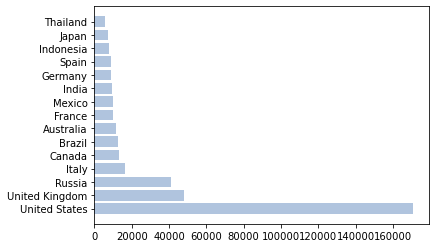

In [143]:
# We also have some informations about the countries of the users. We can plot the 15 most popular ones inside our dataset: 

counts = dict(locations['dir_country_name'].value_counts())
countries = list(counts.keys())[1:16]
values = list(counts.values())[1:16]


plt.barh(countries, values, color ='lightsteelblue') 
plt.show()

### RQ7

#### RQ7.1

In [ ]:
# Basic idea: computing the ratio between 'favorable cases' and 'possible cases'.
# 
# So we create a binary variable: assign 1 if the post gets more than 20% "likes" of the number of followers a user has, 0 otherwise.

In [6]:
# First, merge the two datasets 'posts' and 'profiles'

posts2 = posts[['profile_id', 'numbr_likes']]
profiles2 = profiles[['profile_id', 'followers']]

data = pd.merge(posts2, profiles2, on = "profile_id")
data = data.dropna()

data.shape

(13209910, 3)

In [7]:
# Second, we create the binary variable '20%'

data['20%'] = data.apply(lambda x :  (x.numbr_likes + 1 )/ (x.followers + 1), axis = 1 ) > 0.20

In [8]:
# Third: we compute the probability as the ratio between favorable cases and possible cases

N = len(data)
X = sum(data['20%'])

prob = round(X/N * 100, 2)

print('The probability computed as favorable cases/ possible cases is', prob, '%')


# Note that dropping or not dropping NAs could lead to slightly different approximations.

The probability computed as favorable cases/ possible cases is 15.45 %


In [16]:
# We also have another option: bootstrapping.
# The problem is that it is too slow, and the result we obtain weìhen try to reduce the time will never be accurate.

# I report the code here below

#profiles2 --> profile_id, followers
#lst=[] 
#for i in tqdm(range(500)):
#  random_id= random.sample(list(posts['profile_id']), 500)
#  sample = posts[posts['profile_id'].isin(random_id)].reset_index(drop=True)
  
#  data=pd.merge(sample, profiles2, on = "profile_id")
#  lst.append(sum(data.apply(lambda x :  (x.numbr_likes + 1 )/ (x.followers +1), axis = 1 ) > 0.20)/ data.shape[0])

#### RQ7.2

In [157]:
# Similar appproac to RQ7.1. First, we group by profile_id to know the times a user visited (posted) the same place

posts3 = posts[['profile_id', 'location_id']]

posts_groups = posts3.groupby(['profile_id', 'location_id']).size().reset_index(name='counts')
posts_groups

,profile_id,location_id,counts
0,3.000000e+00,1.000000e+01,1
1,3.000000e+00,5.400000e+01,1
2,3.000000e+00,8.030000e+02,1
3,3.000000e+00,1.526200e+04,1
4,3.000000e+00,2.705200e+04,1
...,...,...,...
21096130,9.001013e+13,6.631216e+14,1
21096131,9.001013e+13,2.075964e+14,1
21096132,9.001013e+13,1.855425e+14,2
21096133,9.001013e+13,2.418404e+08,1


In [161]:
# Then we search on the favorable cases, m, and divide by M, that is the number of possible cases.

m = len(posts_groups[posts_groups['counts'] > 1])
M = len(posts_groups)

# Finally we compute the probability

prob2 = m/M
print('The probability that a user returns to a site after having posted it in the past is:', round(prob2*100, 2), '%')

# This makes sense. If a user posts a certin place, it is likely to be a place he/she usually frequents, so 14% is good probability

The probability that a user returns to a site after having posted it in the past is: 14.04 %


### RQ8

#### Question R8.1

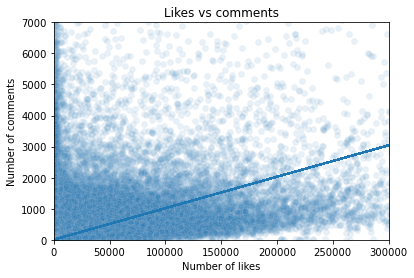

In [13]:
from matplotlib.pyplot import xlabel, ylabel

# We want to draw a scatter plot of number of likes vs number of comments:
plt.xlim(0,300000)
plt.ylim(0,7000)
plt.scatter(posts['numbr_likes'], posts['number_comments'], alpha=0.1, edgecolors = 'lightsteelblue')
xlabel('Number of likes')
ylabel('Number of comments')
plt.title('Likes vs comments')

# Problem: we have too many points! We cannot really say anything about the association between the two variables.
# So we can draw the best fit line to obtain some additional info...

slope, intercept = np.polyfit(posts['numbr_likes'], posts['number_comments'], 1)
plt.plot(posts['numbr_likes'], slope*posts['numbr_likes']+intercept) 

It seems there is some positive correlation... but we can say nothing about the significance! It may have arised from some kind of sampling error...
We have to test this linear relationship. We can do this using the Pearson Correlation Coefficient. We run the following test:

Null Hypothesis --> H0 --> Pearson coefficient 'rho' == 0 

Alternative Hypothesis --> H1 --> rho != 0 

In [200]:
from scipy import stats

# Let's calculate correlation coefficient and p-value between number of likes and number of comments:
rho = stats.pearsonr(posts['numbr_likes'], posts['number_comments'])
r = rho[0]

# What do we expect? From the plot shown above, is clear that there is some linear relationship... so we expect to see a rho that is not too high.
# At the same time we know that our sample size is very big... it is almost an asymptotic! So we expect to see a p-value really really low...

p_value = rho[1]

# And in fact:

print('The Pearson correlation coefficient is', round(r, 3))
print('The corrisponding p-value is', p_value)

# As the p-value is really small, the test is significant and we can reject the Null Hypothesis H0. We can therefore conclude that there is a linear association between the number of likes and the number of comments. However, the value of rho is strongly influenced by the presence of (a lot of) posts with few likes but a lot of comment. 

# But why we were so confident about our p-value's claims?
# There are two reason. The first one is strictly mathematical: the p-value depends on the sample size. So when N increases, p decreases.
# The second one is purely logical: we know that the larger the sample size, the weaker the impact of random errors on our estimate.


The Pearson correlation coefficient is 0.378
The corrisponding p-value is 0.0


#### Question RQ8.2

In [88]:
posts = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv')
columns = ['cts', 'numbr_likes', 'post_id', 'number_comments']
posts = posts[:, columns]

posts = posts.to_pandas().dropna()

In [90]:
# First thing to do is extracting a random sample. Since we have 40+ millions of observations, let's take a very large sample:

import random

id_post = list(posts['post_id'])
random_sample_id = random.sample(id_post, 5000000)

random_sample_posts = posts[posts['post_id'].isin(random_sample_id)].reset_index(drop=True)

In [93]:
# Now let's define a function that classifies the posts based on the time they were published. We will do it following the steps Prof. Ioannis did in class, but for semplicity we will consider just 4 'slots':

random_sample_posts.cts = pd.to_datetime(random_sample_posts.cts)
random_sample_posts['hour'] = random_sample_posts.cts.dt.hour

slots = [(0, 4), (5, 11), (12, 18), (19, 24)]  # 'slots' of hour... as we did in class 

def check_time(hour):
    for slot in slots:
        if hour >= slot[0] and hour <= slot[1]:
            return slots.index(slot)+1            

In [94]:
# Now we add the variable 'slot' to our 'little' dataset:

random_sample_posts['slot'] = random_sample_posts.hour.apply(lambda row:check_time(row))  # new variables with the 'slot' hour

In [95]:
# It's time to see if there is any difference in the number of likes a user receives if he posts in different ours.
# We can use the following command to have a quick look:

import researchpy as rp

rp.summary_cont(random_sample_posts['numbr_likes'].groupby(random_sample_posts['slot']))

# Just looking at the table, we notice that there are some little differences in the verage number of likes. The problem is that we cannot conclude anything! We need to be more rigorous and run a statistical test to compare the different groups

,N,Mean,SD,SE,95% Conf.,Interval
slot,,,,,,
1,771720,276.5513,7531.2333,8.5731,259.7484,293.3542
2,1069797,276.7934,6102.0559,5.8996,265.2303,288.3565
3,1821976,306.3248,6006.3151,4.4498,297.6034,315.0461
4,1336507,280.6655,6261.8616,5.4165,270.0494,291.2816


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcab0f66550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcab0f66af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcab0f66280>,
 'medians': [<matplotlib.lines.Line2D at 0x7fce4d6c50d0>,
 'fliers': [],
 'means': []}

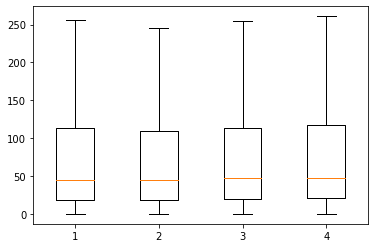

In [63]:
# The typical test when we want to compare the meaf of 2+ groups is the ANOVA test.
# ANOVA relies on the following assumptions:
# Random sampling --> Check
# Omoschedasticity --> Check
# Normality --> NOT Check!

# In fact, the distribution of likes is very skewed, so we can't say that residuals or observations are normally distributed.
# ANOVA is typically 'resistant' to the hypothesis of normality, in the sense that a small deviation from this assumption is allowed, but in this case we are very distant.
# 
# The solution is to proceed with a non-parametric test (which is not based on the assumption of normality as ANOVA does).
# A possibility is the Kruskal Wallis Test, that compares the medians of 2+ populations instead of the mean and that does not require normality.

# First, let's see if the median seem similar in our groups:

likes_df = pd.DataFrame({'likes':random_sample_posts['numbr_likes'], 'slot':random_sample_posts['slot']})
groups = likes_df.groupby('slot').groups

slot_1 = likes_df.loc[groups[1]]['likes']
slot_2 = likes_df.loc[groups[2]]['likes']
slot_3 = likes_df.loc[groups[3]]['likes']
slot_4 = likes_df.loc[groups[4]]['likes']


plt.boxplot([slot_1, slot_2, slot_3, slot_4], showfliers= False)

# They look really similar. Now let's test:

In [67]:
# Numerically:
print('Median for group 1:', np.median(slot_1))
print('Median for group 2:', np.median(slot_2))
print('Median for group 3:', np.median(slot_3))
print('Median for group 4:', np.median(slot_4))

# So they are very close to each oter.

Median for group 1: 45.0
Median for group 2: 45.0
Median for group 3: 47.0
Median for group 4: 48.0


In [83]:
# But if we try to test:
print(scipy.stats.mannwhitneyu(slot_1, slot_2))
print(scipy.stats.mannwhitneyu(slot_1, slot_3))
print(scipy.stats.mannwhitneyu(slot_1, slot_4))
print(scipy.stats.mannwhitneyu(slot_2, slot_3))
print(scipy.stats.mannwhitneyu(slot_2, slot_4))
print(scipy.stats.mannwhitneyu(slot_3, slot_4))

# A very high H statistic ad a p-value of zero! We should reject the null hypothesis and conclude that medians are different, also when they are the same?
# It seems a paradox, but we can try to give an explanation.
# 
# 1) Mann–Whitney test doesn't only focus on the median value, but on the distribution around that value. So, even if two groups have the same median, they may have different distributions around it. Furthermore, when we work with very large samples our test become more precise, and this means that even a small difference is detected: this is reflected in a large decrease in the p-value.
#
# 2) In this case, the problem of 'statistical significance' vs 'practical significant' arises.
# A we said, when we deal with lot of observations, also a tiny difference between two values can become STATISTICALLY significant. But statistically significant does not mean PRATICALLY significant. In other words, big-size sample make the p-value go down very easily, but the Data Scientist must have the sensibility to understand if its value is due to either an actual difference or a simple issue of the size of the dataset.

# So the answer to RQ8.2 is: if we talk about 'statistically-significant differences', yes.
# But if we speak in practical terms, knowing that we are dealing with millions and millions of observations and also remembering that the p-value is affected by the sample size, then we can conclude that there are no differences between our groups.

MannwhitneyuResult(statistic=415255328245.5, pvalue=2.9800285192353245e-10)
MannwhitneyuResult(statistic=692612207348.0, pvalue=3.247759243258442e-68)
MannwhitneyuResult(statistic=504385287825.5, pvalue=1.429469649230281e-147)
MannwhitneyuResult(statistic=956458060973.5, pvalue=5.2524164963347326e-166)
MannwhitneyuResult(statistic=696359319622.0, pvalue=3.1930890043363838e-288)
MannwhitneyuResult(statistic=1207478869358.5, pvalue=5.972150749779974e-33)


In [117]:
# Removing outliers:

#number_likes = random_sample_posts['numbr_likes']

#q1, q3= np.percentile(number_likes,[25, 75])
#iqr = q3-q1

#upper = q3 + (1.5*iqr)
#lower = q3 - (1.5*iqr)

#random_sample_posts['numbr_likes'] = np.where(random_sample_posts['numbr_likes'] > upper , np.nan, random_sample_posts['numbr_likes'])
#random_sample_posts['numbr_likes'] = np.where(random_sample_posts['numbr_likes'] < lower , np.nan, random_sample_posts['numbr_likes'])

#random_sample_posts['numbr_likes'].dropna

# Checking normality assumption

#for slot in range(1, 6):
#    if scipy.stats.shapiro(random_sample_posts[random_sample_posts['slot'] == slot]['numbr_likes'])[1] > 0.05:
#        print('Slot', slot, ': we cannot reject the null hypotesis that data come from a normal distribution')

Median for group 1: 2.0
Median for group 2: 1.0
Median for group 3: 2.0
Median for group 4: 2.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fca66dd4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca66ddd190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca66dd4a00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fca66ddd730>,
 'fliers': [],
 'means': []}

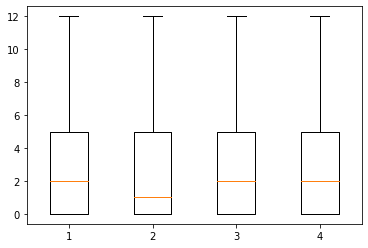

In [110]:
# The same goes for comments!

comments_df = pd.DataFrame({'comments':random_sample_posts['number_comments'], 'slot':random_sample_posts['slot']})
groups_comments = comments_df.groupby('slot').groups

slot_1_2 = comments_df.loc[groups_comments[1]]['comments']
slot_2_2 = comments_df.loc[groups_comments[2]]['comments']
slot_3_2 = comments_df.loc[groups_comments[3]]['comments']
slot_4_2 = comments_df.loc[groups_comments[4]]['comments']

print('Median for group 1:', np.median(slot_1_2))
print('Median for group 2:', np.median(slot_2_2))
print('Median for group 3:', np.median(slot_3_2))
print('Median for group 4:', np.median(slot_4_2))


plt.boxplot([slot_1_2, slot_2_2, slot_3_2, slot_4_2], showfliers= False)


In [ ]:
# The distribution is very similar. So, practically speaking, there is no difference!

#### Question RQ8.3

In [112]:
profiles = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_profiles.csv')

columns2 = ['profile_id', 'followers']
profiles = profiles[:, columns2]

profiles = profiles.to_pandas()
profiles.dropna()

,profile_id,followers
0,4.721050e+09,146.0
1,5.905830e+08,1145.0
2,1.074147e+09,324.0
5,1.450642e+08,192.0
6,2.061868e+09,4137.0
...,...,...
4509578,4.038738e+09,809.0
4509579,1.840612e+08,599.0
4509580,4.070370e+09,261.0
4509581,1.418322e+09,481.0


/Users/simonefacchiano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The maximum number of followers in our dataset is: 285457645.0
The minimum number of followers in our dataset is: 0.0


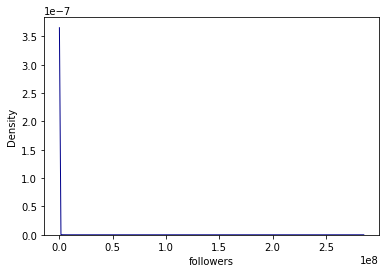

In [115]:
# If we want to plot the histogram we discover that...
sns.distplot(profiles['followers'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Ther very majority of users have few followers! But there are some outliers with thousands and thousands...
# In fact, if we have a closer look:

followers = profiles['followers']
print('The maximum number of followers in our dataset is:', np.max(followers))
print('The minimum number of followers in our dataset is:', np.min(followers))

# So, the histogram is not very useful in this case...
# We can try to extract some summaries.

In [121]:
print('The average is:', round(np.mean(followers))) # Very low, compared to the maximum

# Let's remove the NAs first:
filtered_followers = followers[~np.isnan(followers)]

print('25th, 50th (median), 75th quantiles', np.quantile(filtered_followers, 0.25), np.quantile(filtered_followers, 0.5), np.quantile(filtered_followers, 0.75))

# This is the point!
print('')
print('The average is', round(np.mean(followers)), 'but the median is', np.quantile(filtered_followers, 0.5)) # !

# If we look at the 90th percentile:
print('')
print('The 90th percentile is:', round(np.quantile(filtered_followers, 0.90))) # !!!

# This means that more than 90% of the profiles in the dataset have less than 2500 followers... while the average number was 4740!
# Why? Because the men is not robust to outliers! We have to find an alternative:

The average is: 4740
25th, 50th (median), 75th quantiles 159.0 406.0 974.0

The average is 4740 but the median is 406.0
The 90th percentile is: 2502


/Users/simonefacchiano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


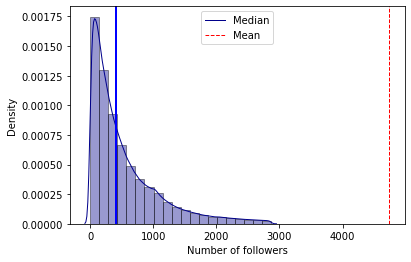

In [124]:
# For example, we can focus on the first 90% of the dataset:

ok_followers = followers[followers <= round(np.quantile(filtered_followers, 0.91))]

# If we try to represent them:
sns.distplot(ok_followers, hist=True, kde=True, 
             bins = 20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
xlabel('Number of followers')             

# But look where the total average is:             
plt.axvline(followers.mean(), color='red', linestyle='dashed', linewidth=1)

# Now it is very evident the way in which outliers are 'pulling-up' the mean (red line).

# If we plot the median (blue line) we can see that it is way more representative than the average in this case
plt.axvline(np.quantile(filtered_followers, 0.5), color='blue', linewidth=2)

plt.gca().legend(('Median','Mean'))

# Now it is understandable what's going on here!

In [ ]:
# Final reflection and considerations

# When we notice the presence of ouliers, a common approach is to delete them.
# In this case, we can't do that. That's because the distribution of followers on social media follows a Pareto-look-alike distribution: deleting the outliers would be like totally changing the reality!
# In this case, in fact, they are not due to measurement or transcription errors: they simply reflect the reality of social networks, where the 80-20 rule is an ever-present constant.
# So, instead of eliminating ouliers, we can simply focus on the majority of the cases.

#### Question RQ8.4

In statistical analysis, plotting the data by choosing the most appropriate representation is a crucial step.
We know we can divide data in two macro-groups: numerical data (discrete and continous) and categorical data. 

When we are working with continuous data, we may want to break them in 'categories' or intervals, for example when we deal with big datasets. This allows us to count how many observations fall inside each interval (or, same thing, we can count the frequency of data that fall in these intervals). The graphical representation that does this is called a histogram. For example, histograms can be used to plot the distribution of heights of children, or to represent the distribution of grades in an exam...

Visually, histograms are very similar to bar plots. However there is a big difference between these two: in barplots, we are working with categorical data.
While in histograms the x axis hosted the continous variable, in the bar chart it serves to list the categories, in correspondence of which the vertical bar indicates the relative frequency (or absolute number) of occurrences.
We can use barplots for represent how many people live in urban areas vs rural reas, or to plot the number of contagions of a disease in the different months.

The bar plot, however, is not very illustrative when there is a total (a very common case is when we work with percentages) to be distributed over the various categories. To stress the fact that the sum of the occurrences is one, the bar plot is therefore replaced by the pie plot, which basically summarizes the same information. For example, pie charts are used for describing the percentage of students attending a certain class divided in males and females, or to illustrate which countries are most responsible of CO2 emissions.

We also have graphs that allow the comparison between two numerical variables: that's the case of scatter plots, that we used in question RQ8.1, which are widely used to visualize correlation of any type, not only linear. For example, scatter plots are use to check the presence of relationships between the height and the weight, or between the extension in m2 of a house and its market value.


#### Question RQ8.5

Finally, we have boxplots. Boxplots are quite similar to histograms, in the sense that both are used to visualize the distribution of a certain numerical variable. The boxplot, however, has the advantage to incorporate information regarding the percentiles of the distribution and the presence of outliers, and allows to compare different groups of observations better than an histogram.

The shape of the 'box', infact, is built in such a way that the line in the center is the median, that is, the value that 'cuts in two' the distribution, while the 'extremes' indicate the first and third quartiles (or the 25th and 75th percentile). The two segments that come out from the box are limited by the
the minimum and the maximum.  Beyond the segments, outliers are represented as points.





In [ ]:
## COPY ALL THIS AT THE TOP

In [4]:
# POSTS
posts = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv')
columns = ['profile_id', 'numbr_likes', 'location_id', 'number_comments']
posts = posts[:, columns]

posts = posts.to_pandas()
posts = posts.dropna()

In [6]:
# PROFILES
profiles = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_profiles.csv')
columns2 = ['profile_id', 'followers']
profiles = profiles[:, columns2]

profiles = profiles.to_pandas()
profiles.dropna()

### AQ

In [ ]:
#### Algorithmic Question

# This algorithm in AQ1 is used to do BHO.
# It consists of two parts.
# In the first part a function 'f1' is defined: it takes in input two arguments, a 'sequence' (of charachters) and an ending point 'end', that # is used for indexing our sequence. In fact, with a for loop we scan the entire sequence until the ending point, and for each charachter we 
# visit, we output it.
# In the second part we define another function, 'f2'. f2 takes the same inputs as f1, with the addition of a starting point 'start'.
# When 'start' and 'end' coincide, we run f1(sequence, end), which works as described above.
# 

## Bonus Points

In [48]:
## Let's try if our code for RQ6 works!

posts = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv')
columns = ['profile_id', 'cts']
posts = posts[:, columns]

posts = posts.to_pandas()
posts = posts.dropna()

In [49]:
posts.cts = pd.to_datetime(posts.cts) # converting in datetime format

In [5]:
posts["_previous_time"] = ( 
    posts.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

In [6]:
posts["_count_cts"] = posts.groupby("profile_id")["cts"].transform("count")

post_dt_by_profile_id = posts[posts["_count_cts"] > 1].reset_index()

posts["delta_time"] = posts["cts"] - posts["_previous_time"]

In [12]:
post_dt_by_profile_id = posts[['profile_id','delta_time']]
post_dt_by_profile_id = post_dt_by_profile_id[post_dt_by_profile_id["delta_time"].notna()]

In [15]:
# Sinceramente non ho ben capito
post_dt_by_profile_id_mean = post_dt_by_profile_id \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

In [18]:
post_dt_by_profile_id['delta_time'].mean()

# Ok funziona. Ora devo applicarlo ai giusti dati

Timedelta('33 days 04:45:21.097663463')

#### Bonus Point 1

In [26]:
# Bonus Points
# a) As we said 90% of users have less than   followers

followers = profiles.followers.dropna()
treshold = round(np.quantile(followers, 0.90))



2502


In [30]:
# Creating two datasets:

profiles = profiles[['profile_id', 'followers', 'cts']]
profiles = profiles[profiles["followers"].notna()]


In [44]:
treshold = round(np.quantile(profiles['followers'], 0.90))

top_10 = profiles[profiles['followers'] >= treshold]
bottom_90 = profiles[profiles['followers'] < treshold]
print(len(profiles))
print(len(top_10))

print(len(top_10)/len(profiles))  # as we expected...

3452771
345378
0.10002922290531287


In [50]:
# Now. We have divided profiles in two parts. What we need to do is to separate the posts apparteining to the 2 subsets

posts_bonus = posts[['profile_id', 'cts']]
top_10_posts = pd.merge(posts_bonus, top_10, on = "profile_id")
bottom_90_posts = pd.merge(posts_bonus, bottom_90, on = "profile_id")

In [80]:
# We use the code of RQ6

# Bottom 90%:
bottom_90_posts["_previous_time"] = ( 
    bottom_90_posts.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

bottom_90_posts["_count_cts"] = bottom_90_posts.groupby("profile_id")["cts"].transform("count")
post_dt_by_profile_id = bottom_90_posts[bottom_90_posts["_count_cts"] > 1].reset_index()
bottom_90_posts["delta_time"] = bottom_90_posts["cts"] - bottom_90_posts["_previous_time"] 

new_bottom_90 = bottom_90_posts[['profile_id','delta_time']]
new_bottom_90 = new_bottom_90[new_bottom_90["delta_time"].notna()]

new_bottom_90_mean = new_bottom_90 \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")


In [82]:
# Top 10%:
top_10_posts["_previous_time"] = ( 
    top_10_posts.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

top_10_posts["_count_cts"] = top_10_posts.groupby("profile_id")["cts"].transform("count")
post_dt_by_profile_id = top_10_posts[top_10_posts["_count_cts"] > 1].reset_index()
top_10_posts["delta_time"] = top_10_posts["cts"] - top_10_posts["_previous_time"] 

new_top_10 = top_10_posts[['profile_id','delta_time']]
new_top_10 = new_top_10[new_top_10["delta_time"].notna()]

new_top_10_mean = new_top_10 \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

In [83]:
print('The average time for the top 10% users with more followers is', np.mean(new_top_10_mean))
print('The average time for the rest is', np.mean(new_bottom_90_mean))

The average time for the top 10% users with more followers is profile_id             2007393800.188173
mean          28 days 17:32:46.147065806
dtype: object
The average time for the rest is profile_id             3477889957.771525
mean          23 days 17:58:51.851115172
dtype: object


/Users/simonefacchiano/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [84]:
# Let's see another little thing

new_treshold = round(np.quantile(profiles['followers'], 0.99)) #20k followers
top_1 = profiles[profiles['followers'] >= new_treshold] # top 1%

top_1_posts = pd.merge(posts_bonus, top_1, on = "profile_id") # merge

# Top 1%:
top_1_posts["_previous_time"] = ( 
    top_1_posts.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

top_1_posts["_count_cts"] = top_1_posts.groupby("profile_id")["cts"].transform("count")
post_dt_by_profile_id = top_1_posts[top_1_posts["_count_cts"] > 1].reset_index()
top_1_posts["delta_time"] = top_1_posts["cts"] - top_1_posts["_previous_time"] 

new_top_1 = top_1_posts[['profile_id','delta_time']]
new_top_1 = new_top_1[new_top_1["delta_time"].notna()]

new_top_1_mean = new_top_1 \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

print('The average time for the rest is', np.mean(new_top_1_mean))

The average time for the rest is profile_id             1085861774.125802
mean          48 days 10:08:09.746302583
dtype: object


/Users/simonefacchiano/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [78]:
print('The average time for the top 1%', np.mean(new_top_1['delta_time']))
print('The average time for the top 10% users with more followers is', np.mean(new_top_10['delta_time']))
print('The average time for the rest is', np.mean(new_bottom_90['delta_time']))


The average time for the top 1% 39 days 07:08:03.877269890
The average time for the top 10% users with more followers is 25 days 10:26:51.187565831
The average time for the rest is 20 days 18:51:35.197643068


#### Bonus point 2


In [ ]:
# NOTE:
# I actually don't understand what is he asking for...
# Does he mean:
# 'Are there DIFFERENT users hat have visited the same location on the same day' or
# Are there users that came back to the same place during the same day?

# Let's try both:

In [3]:
posts = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv')
columns = ['profile_id', 'location_id', 'cts']
posts = posts[:, columns]

posts = posts.to_pandas()
posts = posts.dropna()

In [29]:
posts.cts = pd.to_datetime(posts.cts) # converting in datetime format

posts['date'] = posts.cts.dt.date     # year-month-day

In [6]:
# First way

posts_groups = posts.groupby(['profile_id', 'location_id', 'date']).size().reset_index(name='counts')
posts_groups

,profile_id,location_id,date,counts
0,3.000000e+00,1.000000e+01,2010-07-19,1
1,3.000000e+00,5.400000e+01,2011-11-12,1
2,3.000000e+00,8.030000e+02,2010-08-21,1
3,3.000000e+00,1.526200e+04,2011-01-01,1
4,3.000000e+00,2.705200e+04,2012-07-19,1
...,...,...,...,...
26602382,9.001013e+13,6.631216e+14,2018-06-30,1
26602383,9.001013e+13,2.075964e+14,2019-01-25,1
26602384,9.001013e+13,1.855425e+14,2019-04-12,2
26602385,9.001013e+13,2.418404e+08,2019-05-13,1


In [8]:
print(round(len(posts_groups[posts_groups['counts'] > 1])/len(posts_groups) * 100, 2), '% of users posted the same place two or more times in the same day.')

# The probability is actually quite low. Does it make any sense? Well, yes. In fact, in most cases there is no need to post two or more photos of the same place within a short distance of each other

5.12 % of users posted the same place two or more times in the same day


In [12]:
# Different speech if we extend the time interval to a whole week. In fact, for example, when people go on vacation they are likely to post photos throughout the week. So we expect to see an higher probability.
# We consider the week going from Monday to Sunday. So we first extract the week number:
posts['week'] = posts.cts.dt.isocalendar().week

# Then we group by week and then we count:
posts_groups_week = posts.groupby(['profile_id', 'location_id', 'week']).size().reset_index(name='counts')
posts_groups_week


,profile_id,location_id,week,counts
0,3.000000e+00,1.000000e+01,29,1
1,3.000000e+00,5.400000e+01,45,1
2,3.000000e+00,8.030000e+02,33,1
3,3.000000e+00,1.526200e+04,52,1
4,3.000000e+00,2.705200e+04,29,1
...,...,...,...,...
24564551,9.001013e+13,6.631216e+14,26,1
24564552,9.001013e+13,2.075964e+14,4,1
24564553,9.001013e+13,1.855425e+14,15,2
24564554,9.001013e+13,2.418404e+08,20,1


In [13]:
# Finally we compute the % of people posting the same place during the same week
print(round(len(posts_groups_week[posts_groups_week['counts'] > 1])/len(posts_groups_week) * 100, 2), '% of users posted the same place two or more times in the same week.')

# Note: this is only an approximation. In fact we can interpret the question in 3 ways:
# 1) We can intend the week as the interval [day, day+7]
# 2)                                        [day, day-7]
# 3) Using the 'standard' week (like we did) that is Monday, Tuesday, ... , Saturday, Sunday.

# Since we used the 3rd way, a user who posts on Sunday, and then again the next day, is treated as having posted in two different weeks, despite him having posted within an interval of 48 hours.

9.76 % of users posted the same place two or more times in the same week.


In [58]:
# Second way

posts_groups = posts.groupby(['date', 'location_id'])['profile_id'].nunique()


In [60]:
#len(posts_groups[posts_groups > 1])
#len(posts_groups)

ratio = round(len(posts_groups[posts_groups > 1]) / len(posts_groups),3)

print('In about', ratio*100, '% of the cases, different users visited the same place in the same day')

In about 16.7 % of the cases, different users visited the same place in the same day


In [62]:
# What about the same week?

posts['week'] = posts.cts.dt.isocalendar().week

posts_groups_week = posts.groupby(['week', 'location_id'])['profile_id'].nunique()
posts_groups_week


week  location_id 
1     1.200000e+02    1
      1.410000e+02    3
      2.060000e+02    1
      3.430000e+02    2
      3.890000e+02    1
                     ..
53    2.265224e+15    1
      2.335185e+15    1
      2.346459e+15    2
      2.355736e+15    1
      2.627658e+15    1
Name: profile_id, Length: 11441358, dtype: int64

In [63]:
ratio_week = round(len(posts_groups_week[posts_groups_week > 1]) / len(posts_groups_week),3)

print('In about', ratio_week*100, '% of the cases, different users visited the same place in the same day')


# And obviously, also in this case the probability is higer.

In about 32.6 % of the cases, different users visited the same place in the same day


#### Bonus Point 3

In [2]:
# Provo con 3 milioni di righe solo per vedere se riesco

posts = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv', max_nrows = 3000000)
descr = posts['description']

descr = descr.to_pandas()

In [3]:
# First, we define a function 'descriptions_to_dictionary' that adds every word of a single description into a dictionary 'd'

d = {}

def descriptions_to_dictionary(description):
    
    for word in description.split():
        if (not word.isalpha()):
            description = description.replace(word, '')
        #elif word in ['the', 'a', 'A', 'The', 'and', 'of', 'in', 'for', 'but', 'or', 'an', 'at', 'on']:
             #description = description.replace(word, '')   

    #description_splitted = description.split()

    for word in description.split():
        if word in d:
            d[word] += 1
        else:
            d[word] = 1    
    #return(dict(sorted(d.items(), key=lambda x:x[1], reverse=True)))  # remove the comment!!!

#frase_prova = 'Questa frase è solo una prova , prendila come una prova !😎'
#print(descriptions_to_dictionary(frase_prova)) # --> works


In [5]:
# Second, we apply this function to each row:

descr['description'].apply(descriptions_to_dictionary)

#descr['description']


0          None
1          None
2          None
3          None
4          None
           ... 
2999995    None
2999996    None
2999997    None
2999998    None
2999999    None
Name: description, Length: 3000000, dtype: object

In [7]:
d = dict(sorted(d.items(), key=lambda x:x[1], reverse=True))

# The problem is that we have to clean it!
# In fact the most common words are like 'the', 'a', 'for' ecc ecc
# but we also have non English words...

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [29]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonefacchiano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# One way to clean our dictionary is to delete the words with a number of letters <= 3 (and obvisouly deleting non-english words):

# There is a useful package for doing this:


#import enchant
#english = enchant.Dict('en_US')

clean_d = {key : d[key] for key in d if key not in stopwords.words('english') and len(key) > 3}
clean_d


{'love': 77477,
 'time': 67606,
 'like': 62229,
 'life': 52841,
 'This': 44030,
 'good': 41933,
 'best': 41366,
 'great': 41014,
 'para': 39605,
 'back': 38652,
 'last': 38353,
 'little': 36713,
 'Happy': 35929,
 'today': 35609,
 'first': 35511,
 'beautiful': 34623,
 'much': 33916,
 'know': 32345,
 'night': 31872,
 'make': 31422,
 'amazing': 31274,
 'photography': 29869,
 'always': 28610,
 'work': 28046,
 'come': 27160,
 'people': 26076,
 'Thank': 25527,
 'made': 25155,
 'next': 24782,
 'food': 24068,
 'year': 23244,
 'happy': 23171,
 'take': 22997,
 'weekend': 22304,
 'look': 22044,
 'очень': 21994,
 'place': 21841,
 'want': 21720,
 'still': 21700,
 'also': 21326,
 'going': 21060,
 'never': 20969,
 'really': 20895,
 'every': 20867,
 'week': 20768,
 'would': 20356,
 'many': 20295,
 'только': 20017,
 'меня': 20006,
 'even': 19497,
 'What': 19376,
 'years': 19294,
 'friends': 19164,
 'можно': 18768,
 'Thanks': 18088,
 'When': 17629,
 'days': 17456,
 'ever': 17446,
 'need': 17404,
 'morni

In [51]:
pip install wordcloud

     |████████████████████████████████| 160 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


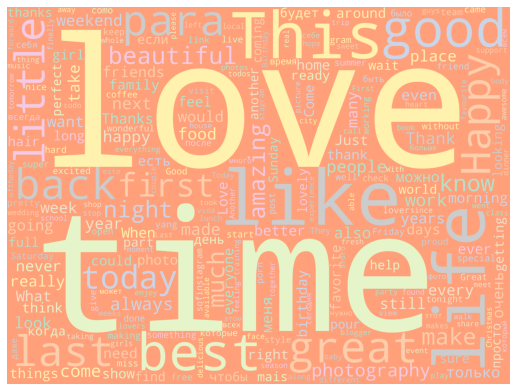

In [83]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color="lightsalmon",
    colormap = 'Pastel2',
    width = 4000,
    height = 3000,
    max_words = 250,
    relative_scaling=0.5
    ).generate_from_frequencies(clean_d)

plt.figure(figsize = (9, 9)) # bigger plot
plt.axis('off') # removing axis
plt.imshow(wc)